In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.9822	Val Loss:	2.3019	Accuracy:	0.1509	F1:	0.1002
2 / 30: Train Loss:	2.2461	Val Loss:	2.1889	Accuracy:	0.1834	F1:	0.0991
3 / 30: Train Loss:	2.1509	Val Loss:	2.1113	Accuracy:	0.2101	F1:	0.1117
4 / 30: Train Loss:	2.0775	Val Loss:	2.0848	Accuracy:	0.2337	F1:	0.1212
5 / 30: Train Loss:	2.0592	Val Loss:	2.0316	Accuracy:	0.2485	F1:	0.1254
6 / 30: Train Loss:	2.0057	Val Loss:	1.9982	Accuracy:	0.2544	F1:	0.1282
7 / 30: Train Loss:	1.9988	Val Loss:	1.9778	Accuracy:	0.2899	F1:	0.1484
8 / 30: Train Loss:	1.9478	Val Loss:	1.9384	Accuracy:	0.3136	F1:	0.1684
9 / 30: Train Loss:	1.8947	Val Loss:	1.8901	Accuracy:	0.3462	F1:	0.1897
10 / 30: Train Loss:	1.8495	Val Loss:	1.8109	Accuracy:	0.3846	F1:	0.2298
11 / 30: Train Loss:	1.7890	Val Loss:	1.7418	Accuracy:	0.4260	F1:	0.2769
12 / 30: Train Loss:	1.6922	Val Loss:	1.5962	Accuracy:	0.4763	F1:	0.3281
13 / 30: Train Loss:	1.6048	Val Loss:	1.4858	Accuracy:	0.5059	F1:	0.3818
14 / 30: Train Loss:	1.5008	Val Loss:	1.4182	Accuracy:	0.529

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.4349	Val Loss:	2.1117	Accuracy:	0.2071	F1:	0.1062
2 / 30: Train Loss:	1.9853	Val Loss:	1.9663	Accuracy:	0.2899	F1:	0.1536
3 / 30: Train Loss:	1.8872	Val Loss:	1.7937	Accuracy:	0.3994	F1:	0.2769
4 / 30: Train Loss:	1.6085	Val Loss:	1.4323	Accuracy:	0.5000	F1:	0.3705
5 / 30: Train Loss:	1.2563	Val Loss:	1.2382	Accuracy:	0.5888	F1:	0.5050
6 / 30: Train Loss:	0.9998	Val Loss:	1.2451	Accuracy:	0.5769	F1:	0.5251
7 / 30: Train Loss:	0.7909	Val Loss:	1.1953	Accuracy:	0.6154	F1:	0.6074
8 / 30: Train Loss:	0.6174	Val Loss:	1.2624	Accuracy:	0.6124	F1:	0.6097
9 / 30: Train Loss:	0.5157	Val Loss:	1.2429	Accuracy:	0.6183	F1:	0.6188
10 / 30: Train Loss:	0.4393	Val Loss:	1.4341	Accuracy:	0.5592	F1:	0.5501
11 / 30: Train Loss:	0.3651	Val Loss:	1.5894	Accuracy:	0.5976	F1:	0.5710
12 / 30: Train Loss:	0.3120	Val Loss:	1.2966	Accuracy:	0.6420	F1:	0.6147
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall 

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.3477	Val Loss:	1.9992	Accuracy:	0.2692	F1:	0.1463
2 / 30: Train Loss:	1.9180	Val Loss:	1.9135	Accuracy:	0.2692	F1:	0.1630
3 / 30: Train Loss:	1.5228	Val Loss:	1.6748	Accuracy:	0.4349	F1:	0.3392
4 / 30: Train Loss:	1.0606	Val Loss:	1.4474	Accuracy:	0.5266	F1:	0.4895
5 / 30: Train Loss:	0.8138	Val Loss:	1.3122	Accuracy:	0.6006	F1:	0.5833
6 / 30: Train Loss:	0.5952	Val Loss:	1.2261	Accuracy:	0.6627	F1:	0.6582
7 / 30: Train Loss:	0.4107	Val Loss:	1.5878	Accuracy:	0.6420	F1:	0.6179
8 / 30: Train Loss:	0.3861	Val Loss:	1.4263	Accuracy:	0.6183	F1:	0.5898
9 / 30: Train Loss:	0.1715	Val Loss:	1.5283	Accuracy:	0.6450	F1:	0.6054
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.70      0.46      0.56        67
               anecdote       0.94      0.70      0.80        43
         cherry picking       0.69      0.64      0.67        56
   

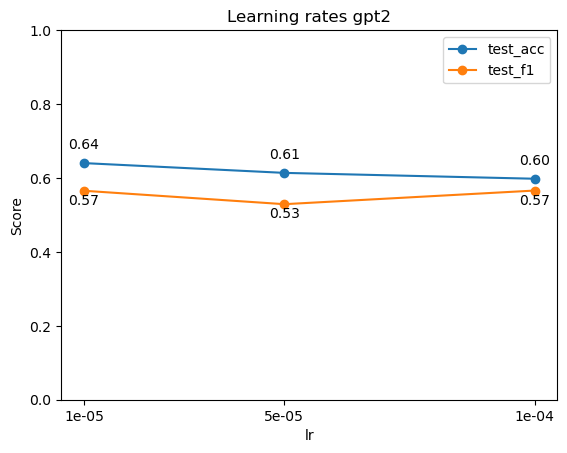

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=True)

In [6]:
%reset -f